## Abdallah Mohamed


## County Health Rankings

This data set is intended to demonstrate how various factors affect the health of counties in the United States, as well as highlight the dramatic range in health from county to county. These factors include access to affordable housing, access to well-paying jobs, education opportunities, and many others. This data is provided as a resource to help identify and address injustices and inequities in the health of counties in the United States.

The data set includes statistics on premature death rates, physical health, mental health, low birthweight, adult smoking, and countless others. The data is primarily numeric.

Documentation can be found at : https://www.countyhealthrankings.org/sites/default/files/media/document/DataDictionary_2021.pdf


In [1]:
import numpy as np
import pandas as pd
import requests
import io

from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from pylab import cm

import matplotlib.pyplot as plt
%matplotlib inline

#### Read in the data 

In [2]:
url = 'http://www.countyhealthrankings.org/sites/default/files/media/document/analytic_data2021.csv'
response = requests.get(url)

file_object = io.StringIO(response.content.decode('utf-8'))
df = pd.read_csv(file_object,skiprows=[0])

In [3]:
df.head()

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
0,0,0,0,US,United States,2021,NaN,6906.641094,3854074.0,915437195.0,...,0.507502,166582199,328239523,NaN,NaN,0.192690,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2021,NaN,9819.887431,82249.0,13651801.0,...,0.516739,2533668,4903185,NaN,NaN,0.409632,1957932.0,4779736.0,NaN,NaN
2,1,1,1001,AL,Autauga County,2021,1.0,7830.053484,787.0,155765.0,...,0.515080,28777,55869,NaN,NaN,0.420022,22921.0,54571.0,NaN,NaN
3,1,3,1003,AL,Baldwin County,2021,1.0,7680.477270,3147.0,600539.0,...,0.515096,114987,223234,NaN,NaN,0.422791,77060.0,182265.0,NaN,NaN
4,1,5,1005,AL,Barbour County,2021,1.0,11476.629416,515.0,69011.0,...,0.470793,11622,24686,NaN,NaN,0.677896,18613.0,27457.0,NaN,NaN


There are USA aggregate data and state aggregate level data, let's focus only on counties

In [4]:
df = df[df['countycode']!=0]

There are 16 Maine counties that we will be taking a close look at later on 

In [5]:
maine_fipscode = df[(df['state']=='ME')].fipscode
maine_county_labels = [' Andr',' Aroo',' Cumb', ' Fran', ' Hanc',' Kenn', ' Knox', ' Linc', ' Oxfo', 
                       ' Peno', ' Pisc', ' Saga', ' Some', ' Waldo', ' Wash', ' York']

There are a lot of columns we do need. In particular the numerator, denominator, confidence interval, ... columns for forming the raw_values are included. We get rid of them 

In [6]:
# select all the columns from CHR with raw values
## these columns contain the major health-related variables
all_cols = df.columns
col_names = [i for i in all_cols if 'rawvalue' in i]
print ('Number of CHR variables: ',len(col_names))
## We include the fipscode column because we want to get only the maine counties out later on
col_names.insert(0,"fipscode") 
df_sub = df[col_names]
df_sub = df_sub.set_index('fipscode')
df_sub.head()

Number of CHR variables:  79


,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,...,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
fipscode,,,,,,,,,,,,,,,,,,,,,
1001,7830.053484,0.198392,4.501499,4.850214,0.092018,0.198108,0.330,6.7,0.306,0.691301,...,0.159731,0.198643,0.004761,0.011742,0.001038,0.029909,0.737708,0.008033,0.515080,0.420022
1003,7680.477270,0.164607,3.647978,4.768294,0.082920,0.185133,0.300,7.8,0.247,0.737135,...,0.209780,0.086076,0.007803,0.010661,0.000690,0.047188,0.832073,0.007085,0.515096,0.422791
1005,11476.629416,0.298415,5.569267,5.590494,0.113553,0.255308,0.412,5.5,0.280,0.531668,...,0.196913,0.478287,0.006886,0.004699,0.002106,0.045248,0.455116,0.018907,0.470793,0.677896
1007,12172.562382,0.238533,4.894377,5.271114,0.102210,0.230848,0.374,7.6,0.334,0.162514,...,0.166696,0.210726,0.004599,0.002143,0.001161,0.027820,0.744083,0.003353,0.467313,0.683526
1009,11096.050649,0.219856,4.986622,5.357809,0.074305,0.229550,0.330,7.9,0.333,0.156345,...,0.187009,0.015080,0.006399,0.003199,0.001159,0.096531,0.867707,0.016185,0.507626,0.899515


We get rid of the columns that do not have at least 70% of the rows with values

In [7]:
#count and find the percentage of null values and concatenat the results
missing = pd.concat([df_sub.isnull().sum(), 100*df_sub.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage']
smissing = missing.sort_values(by='count', ascending=False)
print(smissing)
good_cols = smissing[smissing['percentage'] < 30].index
good_cols = good_cols.sort_values()
df_sub2 = df_sub[good_cols]
df_sub2.head()

               count  percentage
v129_rawvalue   1912   60.852960
v015_rawvalue   1842   58.625080
v149_rawvalue   1836   58.434118
v138_rawvalue   1403   44.653087
v158_rawvalue   1321   42.043285
...              ...         ...
v136_rawvalue      0    0.000000
v060_rawvalue      0    0.000000
v145_rawvalue      0    0.000000
v002_rawvalue      0    0.000000
v144_rawvalue      0    0.000000

[79 rows x 2 columns]


,v001_rawvalue,v002_rawvalue,v003_rawvalue,v004_rawvalue,v005_rawvalue,v009_rawvalue,v011_rawvalue,v014_rawvalue,v021_rawvalue,v023_rawvalue,...,v148_rawvalue,v153_rawvalue,v154_rawvalue,v155_rawvalue,v156_rawvalue,v159_rawvalue,v160_rawvalue,v161_rawvalue,v166_rawvalue,v168_rawvalue
fipscode,,,,,,,,,,,,,,,,,,,,,
1001,7830.053484,0.198392,0.130080,0.000468,6650.0,0.198108,0.330,23.764041,0.890000,0.027281,...,16.562431,0.732906,0.133759,0.42,155.095523,3.126968,2.917280,18.483525,0.805674,0.885166
1003,7680.477270,0.164607,0.167534,0.000702,3471.0,0.185133,0.300,26.006904,0.880000,0.027258,...,14.350620,0.752453,0.111740,0.46,133.604842,3.192381,3.037912,19.287661,0.818164,0.908062
1005,11476.629416,0.298415,0.176732,0.000322,5314.0,0.255308,0.412,37.114262,0.820690,0.037952,...,21.211240,0.608989,0.142707,0.39,102.459673,2.389161,2.008629,11.325918,0.605243,0.732131
1007,12172.562382,0.238533,0.134299,0.000536,6690.0,0.230848,0.374,37.786446,0.880000,0.030628,...,20.410337,0.744159,0.087444,0.40,26.588748,2.688775,2.563367,16.955833,0.692062,0.790574
1009,11096.050649,0.219856,0.179347,0.000207,4440.0,0.229550,0.330,31.239778,0.929256,0.026687,...,21.449131,0.787787,0.078048,0.40,43.309562,2.901714,2.781497,20.022098,0.730081,0.804906


I do a demonstration plot that should be helpful for the Assignment 3 work 

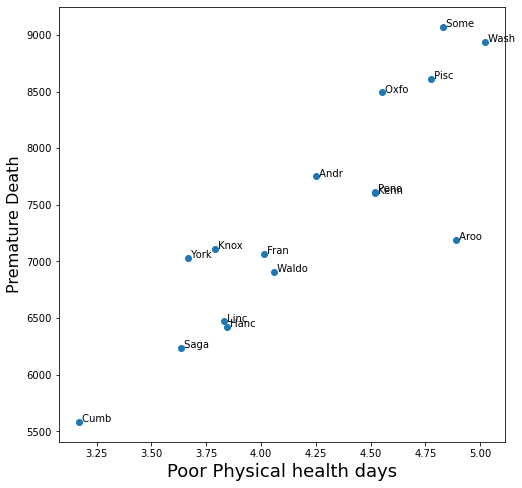

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

# a boolean series gets created with true values for maine counties 
maine_counties = df_sub2.index.isin(maine_fipscode)

x_axis = df_sub2[maine_counties]['v036_rawvalue']
y_axis = df_sub2[maine_counties]['v001_rawvalue']
ax.scatter(x_axis, y_axis)

ax.set_xlabel('Poor Physical health days', fontsize=18)
ax.set_ylabel('Premature Death', fontsize=16)

for i, label in enumerate(maine_county_labels):
    plt.annotate(label, (x_axis.iloc[i], y_axis.iloc[i]))
    
plt.show()

**For all columns, fill in missing values with the median and normalize the data by subtracting mean anddividing by the standard deviation (hint : you have done this before).**

**Fill the Missing values with the Median**

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_sub2)
  
data = imputer.transform(df_sub2)

**Normalize the data**

In [10]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.24724251, -0.05404943, -0.10188911, ...,  0.00492786,
         0.58432606,  0.25049753],
       [-0.30294768, -0.71441216,  0.50962957, ...,  0.12103158,
         0.72553773,  0.61614764],
       [ 1.11081531,  1.90100549,  0.65980289, ..., -1.02850982,
        -1.68170618, -2.19353192],
       ...,
       [-0.15376594, -0.62592849,  0.14427898, ...,  1.53998993,
         1.59823079,  0.92521938],
       [-0.72728419, -0.6772501 ,  0.68168871, ..., -0.13819549,
         0.31523036,  0.44881436],
       [-1.72634125, -0.63128965,  0.19232084, ..., -0.13819549,
         0.15726705,  1.07039715]])

In [11]:
data = pd.DataFrame(data, columns = list(df_sub2.columns))

**We will attempt to predict Premature death (v001_rawvalue) from the remaining attributes. 
Remove any rows that do not have values for v001_rawvalue. Assign X and y variables.**

In [12]:
y = data[["v001_rawvalue"]]
X = data.drop(columns = "v001_rawvalue")

**Create training, validation, and test datasets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [15]:
#checking of size (rows) of the data
print(f"There are {df.shape[0]} rows in the dataset")
#checking of size (rows) of the data
print(f"There are {X_train.shape[0]} rows in train data which is {round(X_train.shape[0]/df.shape[0]*100, 0)} ")
#checking of size (rows) of the data
print(f"There are {X_test.shape[0]} rows in test data which is {round(X_test.shape[0]/df.shape[0]*100, 0)} ")
#checking of size (rows) of the data
print(f"There are {X_valid.shape[0]} rows in valid data which is {round(X_valid.shape[0]/df.shape[0]*100, 0)} ")

There are 3142 rows in the dataset
There are 1884 rows in train data which is 60.0 
There are 629 rows in test data which is 20.0 
There are 629 rows in valid data which is 20.0 


**Run a linear regression on the data and compute the root mean squared error (this will be a value that we will try to beat with our NN)**

**Linear Regression**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import linear regression
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

# print RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 0.24317560397080173


In [17]:
mean_squared_error(y_test, predictions)

0.059134374366564206

**Develop and train a Neural Network to predict premature death from the independent values. Test the performance of the network against your validation set. Experiment with different configurations (#,size of the layers).**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [37]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

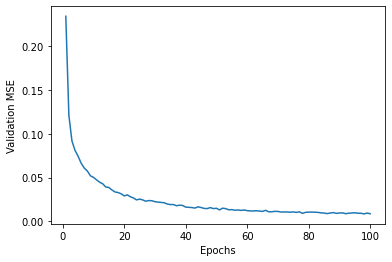

In [38]:
num_epochs = 100
mse_histories = []

history = model.fit(X_train, y_train,validation_data=(X_valid, y_valid),epochs=num_epochs, batch_size=1, verbose=0)

mse_history = history.history['loss']
mse_histories.append(mse_history)

plt.plot(range(1, len(mse_histories[0]) + 1), mse_histories[0])
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

**Choose the best network from the above and evaluate the performance against the test dataset. Did you manage to beat the linear regression result ?**

In [39]:
model.fit(X_train, y_train ,epochs=20, batch_size=1, verbose=0)
test_data_mse = model.evaluate(X_test, y_test)
print('RMSE using NN', np.sqrt(test_data_mse))

20/20 [==============================] - 0s 1ms/step - loss: 0.0861
RMSE using NN 0.29339920210430787


No, Rmse is 0.29 which is above the linear regression result in the test dataset. 